In [1]:
import tensorflow as tf
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory as Images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout

In [5]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna(axis='columns')  # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def calculate_average_image_size(directory):
    folder_names = []
    avg_widths = []
    avg_heights = []

    for subdir in os.listdir(directory):
        folder_path = os.path.join(directory, subdir)
        if os.path.isdir(folder_path):
            widths = []
            heights = []
            for file in os.listdir(folder_path):
                if file.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')):
                    image_path = os.path.join(folder_path, file)
                    with Image.open(image_path) as img:
                        widths.append(img.width)
                        heights.append(img.height)

            if widths and heights:  # Check if the list is not empty
                avg_width = sum(widths) / len(widths)
                avg_height = sum(heights) / len(heights)
                folder_names.append(subdir)
                avg_widths.append(avg_width)
                avg_heights.append(avg_height)

    return folder_names, avg_widths, avg_heights

def plot_average_image_size(folder_names, avg_widths, avg_heights):
    plt.figure(figsize=(12, 8))

    plt.barh(folder_names, avg_widths, color='lightblue', alpha=0.6, label='Average Width')
    plt.barh(folder_names, avg_heights, color='salmon', alpha=0.6, label='Average Height')

    plt.xlabel('Pixels')
    plt.ylabel('Class Folders')
    plt.title('Average Image Width and Height per Class Folder')
    plt.legend()
    plt.show()



In [ ]:
def check_dataset(folder_path):
    dataset_info = {}
    # List all subfolders (classes) in the dataset folder
    classes = os.listdir(folder_path)

    for class_name in classes:
        class_folder = os.path.join(folder_path, class_name)
        # List all images in the class folder
        images = os.listdir(class_folder)
        # Check the number of images in the class
        num_images = len(images)
        # Check if any images are corrupted or unreadable
        num_corrupted_images = 0
        for image_file in images:
            image_path = os.path.join(class_folder, image_file)
            try:
                Image.open(image_path).verify()
            except Exception as e:
                print(f"Error reading image {image_path}: {e}")
                num_corrupted_images += 1
        # Store information about the class in the dataset_info dictionary
        dataset_info[class_name] = {
            "num_images": num_images,
            "num_corrupted_images": num_corrupted_images
        }
    return dataset_info

In [ ]:
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape: {img.shape}")

In [2]:
!kaggle datasets download -d onurinan1/dateset-23-skin

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Dataset URL: https://www.kaggle.com/datasets/onurinan1/dateset-23-skin
License(s): unknown
 99%|██████████████████████████████████████▊| 3.83G/3.85G [00:38<00:00, 101MB/s]
100%|███████████████████████████████████████| 3.85G/3.85G [00:38<00:00, 107MB/s]


In [3]:
import zipfile
zip=zipfile.ZipFile('dateset-23-skin.zip')
zip.extractall()
zip.close()

In [4]:
!pip install split-folders

In [5]:
import splitfolders
input_folder = "dataset/"
output_folder = "dataset/"
splitfolders.ratio(input_folder,
                   output=output_folder,
                   seed=42,
                   ratio=(0.8, 0.1, 0.1),
                   group_prefix=None,
                   move=False)


Copying files: 23184 files [00:06, 3439.18 files/s]


In [6]:
import shutil
dataset_dir = "dataset"

folders_to_keep = ['train', 'val', 'test']

for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(folder_path) and folder_name not in folders_to_keep:
        # Delete the folder
        print(f"Deleting folder: {folder_path}")
        shutil.rmtree(folder_path)

print("Unwanted folders deleted successfully.")

Deleting folder: dataset/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Deleting folder: dataset/Vasculitis Photos
Deleting folder: dataset/Vascular Tumors
Deleting folder: dataset/Nail Fungus and other Nail Disease
Deleting folder: dataset/Eczema Photos
Deleting folder: dataset/Seborrheic Keratoses and other Benign Tumors
Deleting folder: dataset/Warts Molluscum and other Viral Infections
Deleting folder: dataset/Herpes HPV and other STDs Photos
Deleting folder: dataset/Exanthems and Drug Eruptions
Deleting folder: dataset/Atopic Dermatitis Photos
Deleting folder: dataset/Melanoma Skin Cancer Nevi and Moles
Deleting folder: dataset/Psoriasis pictures Lichen Planus and related diseases
Deleting folder: dataset/Bullous Disease Photos
Deleting folder: dataset/Acne and Rosacea Photos
Deleting folder: dataset/Lupus and other Connective Tissue diseases
Deleting folder: dataset/Poison Ivy Photos and other Contact Dermatitis
Deleting folder: dataset/Urticaria Hives
Deletin

In [7]:
data_folder='dataset/train'

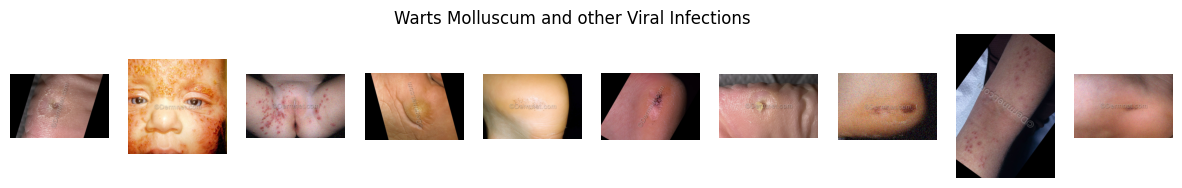

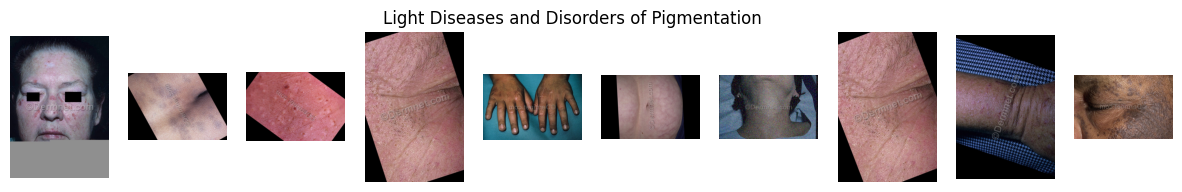

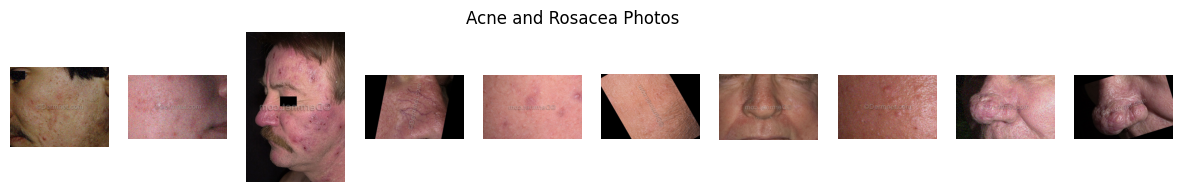

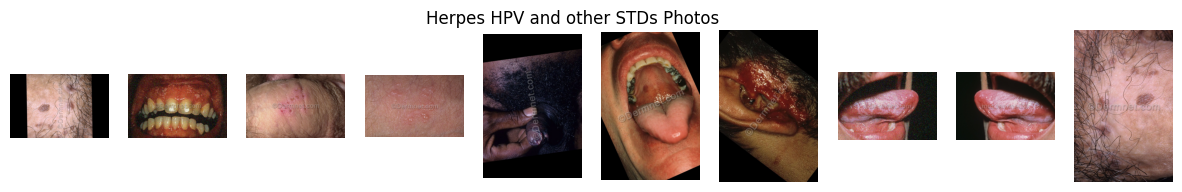

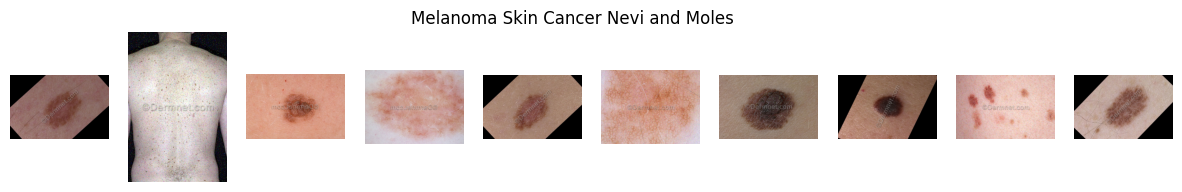

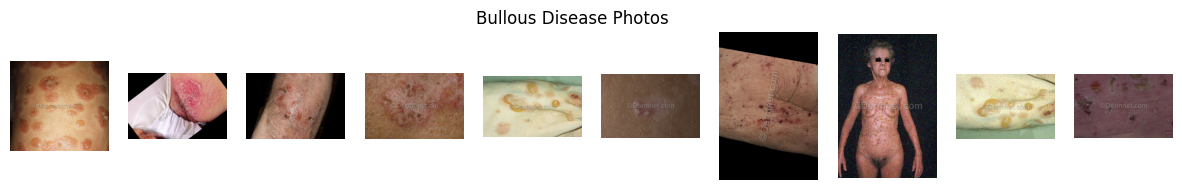

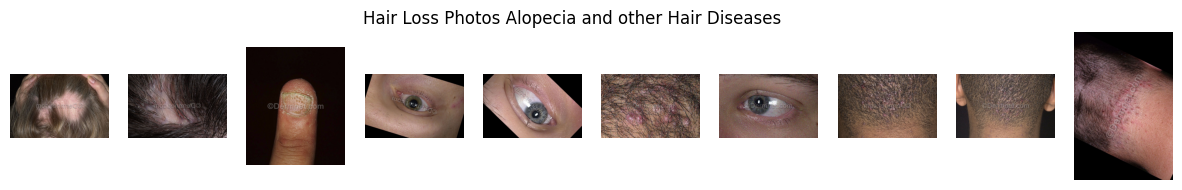

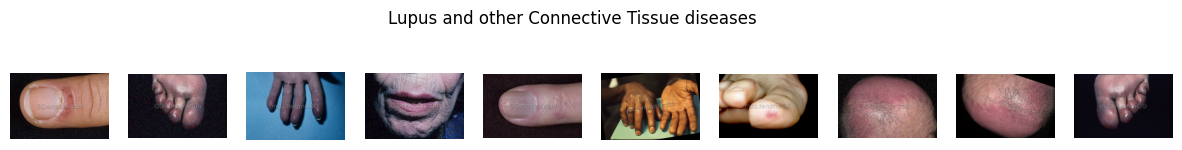

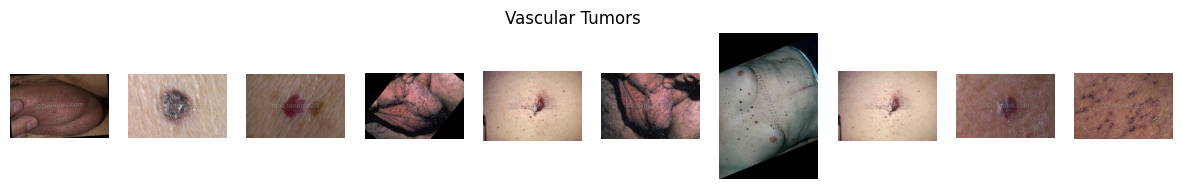

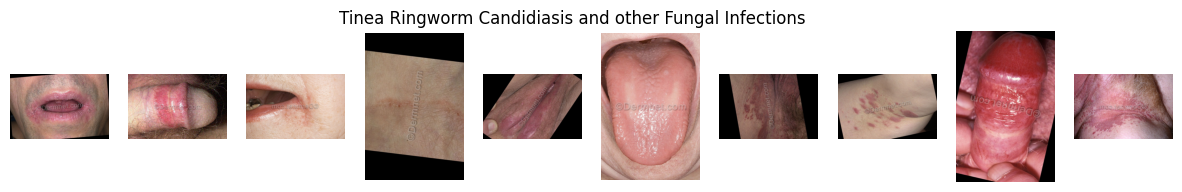

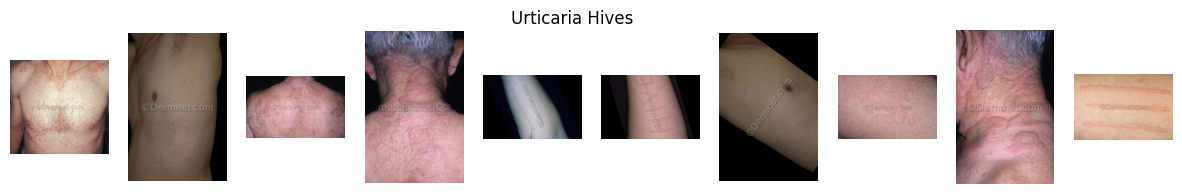

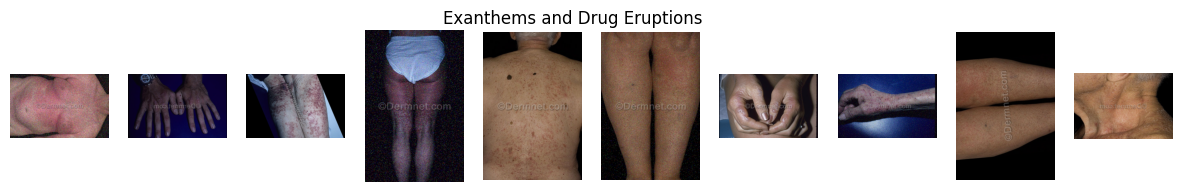

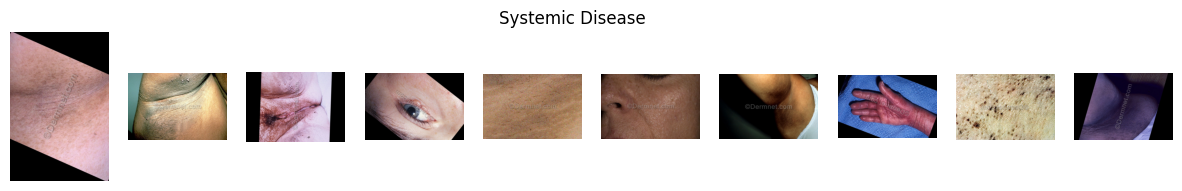

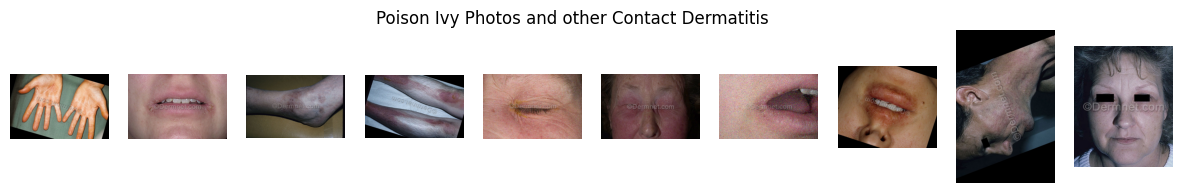

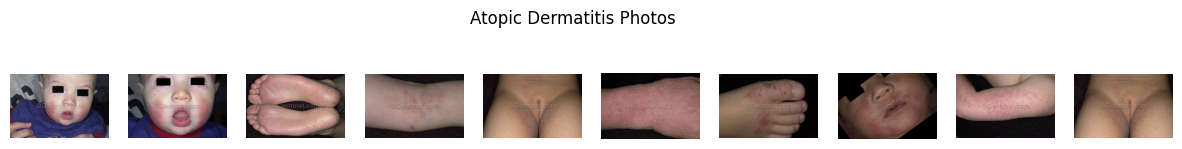

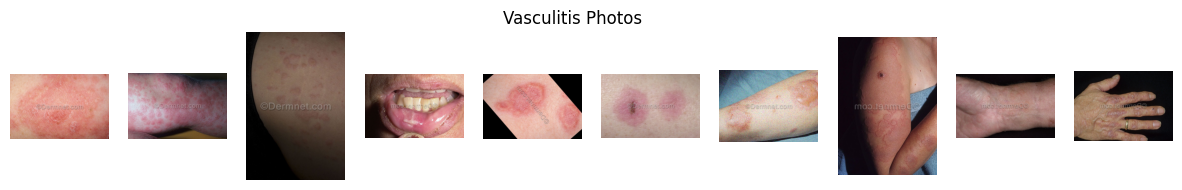

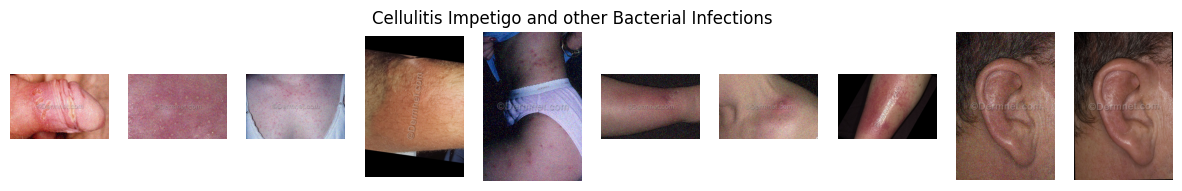

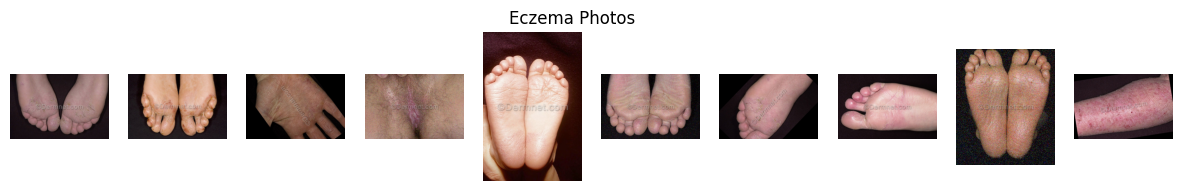

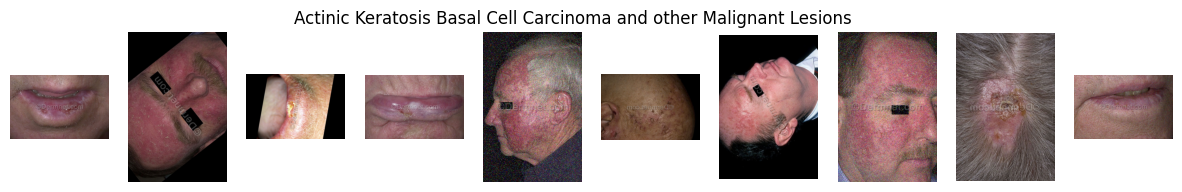

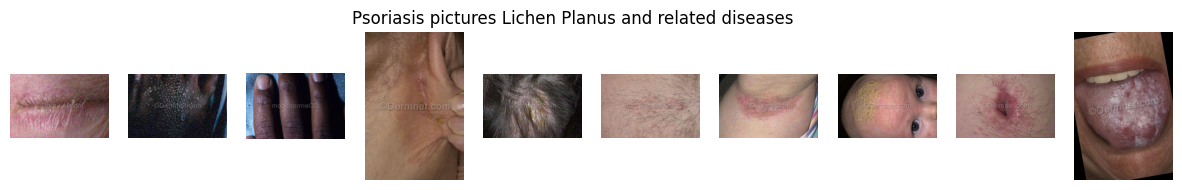

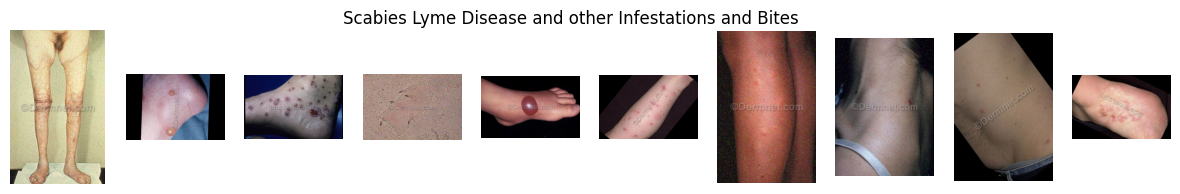

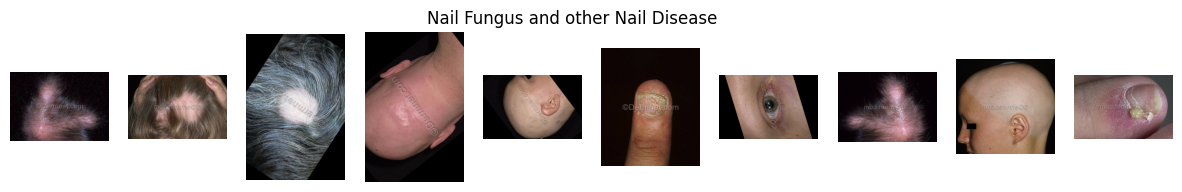

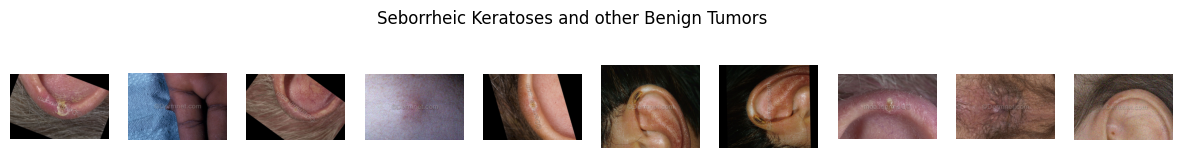

In [25]:
classes = os.listdir(data_folder)
num_images_per_class = 10

# Display images from each class
for class_name in classes:
    class_folder = os.path.join(data_folder, class_name)
    # List all images in the class folder
    images = os.listdir(class_folder)

    # Display the specified number of images from each class
    num_images_to_display = min(num_images_per_class, len(images))
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 2))
    fig.suptitle(class_name)

    for i in range(num_images_to_display):
        image_path = os.path.join(class_folder, images[i])
        image = Image.open(image_path)

        axes[i].imshow(image)
        axes[i].axis('off')

    plt.show()

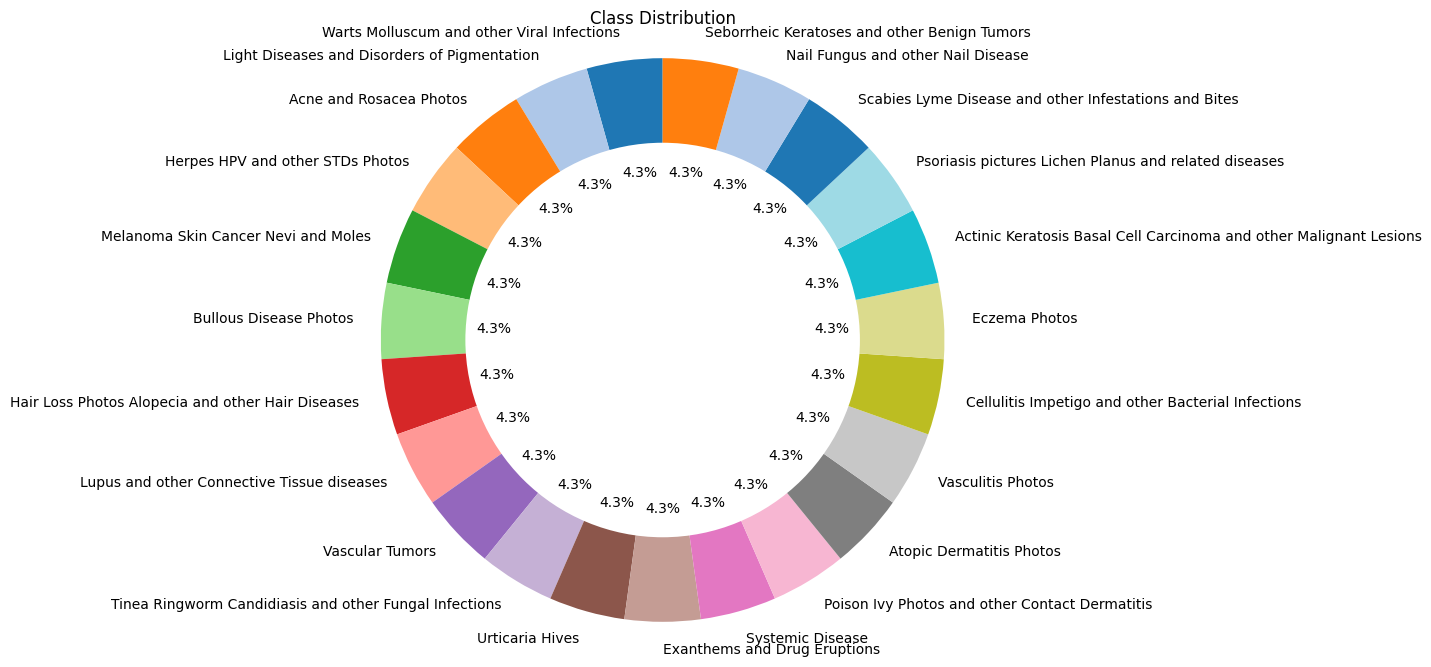

In [26]:
class_counts = {}
total_images = 0
for class_name in classes:
    class_folder = os.path.join(data_folder, class_name)
    # Count the number of images in the class folder
    num_images = len(os.listdir(class_folder))
    class_counts[class_name] = num_images
    total_images += num_images

# Calculate percentages for each class
class_percentages = {class_name: (count / total_images) * 100 for class_name, count in class_counts.items()}

# Plot donut chart for overall class distribution
plt.figure(figsize=(8, 8))
plt.title("Class Distribution")
plt.pie(class_percentages.values(), labels=class_percentages.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [27]:
dataset_info = check_dataset(data_folder)
for class_name, info in dataset_info.items():
    print(f"Class: {class_name}")
    print(f"Number of images: {info['num_images']}")
    print(f"Number of corrupted images: {info['num_corrupted_images']}")
    print()

Class: Warts Molluscum and other Viral Infections
Number of images: 806
Number of corrupted images: 0

Class: Light Diseases and Disorders of Pigmentation
Number of images: 806
Number of corrupted images: 0

Class: Acne and Rosacea Photos
Number of images: 806
Number of corrupted images: 0

Class: Herpes HPV and other STDs Photos
Number of images: 806
Number of corrupted images: 0

Class: Melanoma Skin Cancer Nevi and Moles
Number of images: 806
Number of corrupted images: 0

Class: Bullous Disease Photos
Number of images: 806
Number of corrupted images: 0

Class: Hair Loss Photos Alopecia and other Hair Diseases
Number of images: 806
Number of corrupted images: 0

Class: Lupus and other Connective Tissue diseases
Number of images: 806
Number of corrupted images: 0

Class: Vascular Tumors
Number of images: 806
Number of corrupted images: 0

Class: Tinea Ringworm Candidiasis and other Fungal Infections
Number of images: 806
Number of corrupted images: 0

Class: Urticaria Hives
Number of

In [12]:
import os
from PIL import Image

def calculate_average_image_size(directory):
    total_width = 0
    total_height = 0
    num_images = 0

    # Traverse through all files in the directory
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)

        if os.path.isdir(folder_path):
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)

                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        total_width += width
                        total_height += height
                        num_images += 1
                except:
                    continue  # If it's not an image, skip

    # Calculate average width and height
    avg_width = total_width / num_images if num_images > 0 else 0
    avg_height = total_height / num_images if num_images > 0 else 0

    return avg_width, avg_height

# Directories for your datasets
train_directory = "dataset/train"
val_directory = "dataset/val"
test_directory = "dataset/test"

# Calculate average size for each dataset
avg_train_size = calculate_average_image_size(train_directory)
avg_val_size = calculate_average_image_size(val_directory)
avg_test_size = calculate_average_image_size(test_directory)

# Output the results
print(f"Average Train Image Size: {avg_train_size}")
print(f"Average Validation Image Size: {avg_val_size}")
print(f"Average Test Image Size: {avg_test_size}")


Average Train Image Size: (664.4458949185457, 539.8001941957061)
Average Validation Image Size: (663.6913043478261, 541.0191304347826)
Average Test Image Size: (662.4313725490196, 542.4313725490196)


In [8]:
train_dir="dataset/train/"
val_dir="dataset/val/"
train_generator = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_data = train_generator.flow_from_directory(train_dir,
                                                   target_size= (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 32,
                                                   shuffle = True)
val_generator = ImageDataGenerator(rescale= 1./255)
val_data = val_generator.flow_from_directory(val_dir,
                                                   target_size= (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 32,
                                                   shuffle = True)

Found 18538 images belonging to 23 classes.
Found 2300 images belonging to 23 classes.


In [9]:

train_data_truesize = train_generator.flow_from_directory(train_dir,
                                                   target_size= (663,540),
                                                   class_mode = 'categorical',
                                                   batch_size = 32,
                                                   shuffle = True)
val_data_truesize = val_generator.flow_from_directory(val_dir,
                                                   target_size= (663,540),
                                                   class_mode = 'categorical',
                                                   batch_size = 32,
                                                   shuffle = True)

Found 18538 images belonging to 23 classes.
Found 2300 images belonging to 23 classes.


In [14]:
train_data.classes

array([ 0,  0,  0, ..., 22, 22, 22], dtype=int32)

In [15]:
train_data.class_indices

{'Acne and Rosacea Photos': 0,
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 1,
 'Atopic Dermatitis Photos': 2,
 'Bullous Disease Photos': 3,
 'Cellulitis Impetigo and other Bacterial Infections': 4,
 'Eczema Photos': 5,
 'Exanthems and Drug Eruptions': 6,
 'Hair Loss Photos Alopecia and other Hair Diseases': 7,
 'Herpes HPV and other STDs Photos': 8,
 'Light Diseases and Disorders of Pigmentation': 9,
 'Lupus and other Connective Tissue diseases': 10,
 'Melanoma Skin Cancer Nevi and Moles': 11,
 'Nail Fungus and other Nail Disease': 12,
 'Poison Ivy Photos and other Contact Dermatitis': 13,
 'Psoriasis pictures Lichen Planus and related diseases': 14,
 'Scabies Lyme Disease and other Infestations and Bites': 15,
 'Seborrheic Keratoses and other Benign Tumors': 16,
 'Systemic Disease': 17,
 'Tinea Ringworm Candidiasis and other Fungal Infections': 18,
 'Urticaria Hives': 19,
 'Vascular Tumors': 20,
 'Vasculitis Photos': 21,
 'Warts Molluscum and other Viral Inf

In [16]:
base_model = tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,
    weights='imagenet',
    input_tensor=Input(shape = (224, 224, 3))
)

/tmp/ipykernel_36/3550302771.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNet(


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 663, 540, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 332, 270, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 332, 270, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 332, 270, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 332, 270, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 332, 270, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 332, 270, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 332, 270, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 332, 270, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 332, 270, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 333, 271, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 166, 135, 64)        │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 166, 135, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 166, 135, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 166, 135, 128)       │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 166, 135, 128)       │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 166, 135, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 166, 135, 128)       │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 166, 135, 128)       │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 166, 135, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 166, 135, 128)       │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [17]:
len(base_model.layers)

86

In [18]:
fine_tuning_at = 75

In [19]:
for layer in base_model.layers[:fine_tuning_at]:
  layer.trainable = False

In [20]:
for layer in base_model.layers:
  print(layer, layer.trainable)

<InputLayer name=input_layer, built=True> False
<Conv2D name=conv1, built=True> False
<BatchNormalization name=conv1_bn, built=True> False
<ReLU name=conv1_relu, built=True> False
<DepthwiseConv2D name=conv_dw_1, built=True> False
<BatchNormalization name=conv_dw_1_bn, built=True> False
<ReLU name=conv_dw_1_relu, built=True> False
<Conv2D name=conv_pw_1, built=True> False
<BatchNormalization name=conv_pw_1_bn, built=True> False
<ReLU name=conv_pw_1_relu, built=True> False
<ZeroPadding2D name=conv_pad_2, built=True> False
<DepthwiseConv2D name=conv_dw_2, built=True> False
<BatchNormalization name=conv_dw_2_bn, built=True> False
<ReLU name=conv_dw_2_relu, built=True> False
<Conv2D name=conv_pw_2, built=True> False
<BatchNormalization name=conv_pw_2_bn, built=True> False
<ReLU name=conv_pw_2_relu, built=True> False
<DepthwiseConv2D name=conv_dw_3, built=True> False
<BatchNormalization name=conv_dw_3_bn, built=True> False
<ReLU name=conv_dw_3_relu, built=True> False
<Conv2D name=conv_pw_3,

In [21]:
base_model.output

<KerasTensor shape=(None, 7, 7, 1024), dtype=float32, sparse=False, name=keras_tensor_85>

In [22]:
head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Dense(units = 513, activation='relu')(head_model)
head_model = Dropout(rate = 0.2)(head_model)
head_model = Dense(units = 513, activation='relu')(head_model)
head_model = Dropout(rate = 0.2)(head_model)
head_model = Dense(23, activation='softmax')(head_model)

In [23]:
head_model

<KerasTensor shape=(None, 23), dtype=float32, sparse=False, name=keras_tensor_91>

In [24]:
base_model.input

[<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor>]

In [25]:
network = Model(inputs = base_model.input, outputs = head_model)

In [26]:
network.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,030,193 (15.37 MB)

 Trainable params: 2,390,577 (9.12 MB)

 Non-trainable params: 1,639,616 (6.25 MB)

In [27]:
network.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
train_data

In [32]:
history = network.fit(train_data, epochs=10,validation_data=val_data)

Epoch 1/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 376s 617ms/step - accuracy: 0.2923 - loss: 2.4361 - val_accuracy: 0.2187 - val_loss: 3.0817
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 358s 591ms/step - accuracy: 0.5513 - loss: 1.4820 - val_accuracy: 0.4083 - val_loss: 2.2172
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 335s 571ms/step - accuracy: 0.6690 - loss: 1.0744 - val_accuracy: 0.3691 - val_loss: 2.8092
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 330s 562ms/step - accuracy: 0.7412 - loss: 0.8333 - val_accuracy: 0.4891 - val_loss: 1.9109
Epoch 5/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 340s 580ms/step - accuracy: 0.7864 - loss: 0.6802 - val_accuracy: 0.5674 - val_loss: 1.6656
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 339s 578ms/step - accuracy: 0.8180 - loss: 0.5710 - val_accuracy: 0.4165 - val_loss: 3.1342
Epoch 7/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 339s 577ms/step - accuracy: 0.8473 - loss: 0.4854 - val_accuracy: 0.5313 - val_loss: 2.3517
Epoch 8/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 341s 582ms/step - accuracy: 0.8592 -

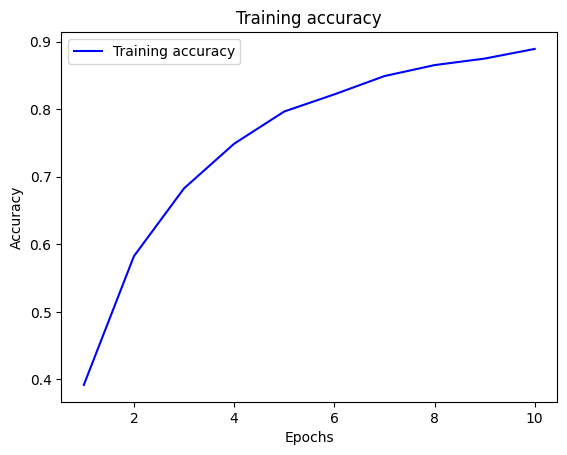

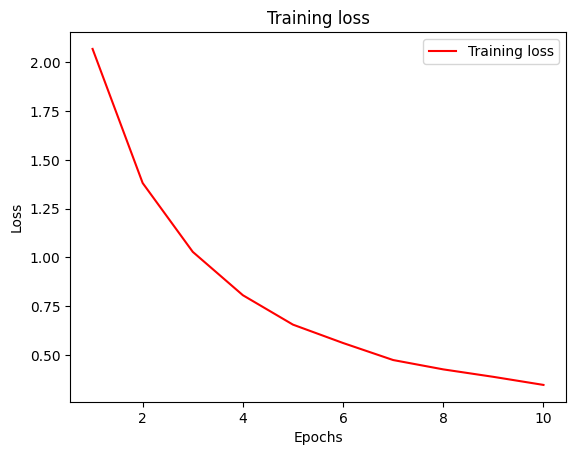

In [33]:
accuracy = history.history['accuracy']
loss = history.history['loss']

# Get the number of epochs
epochs = range(1, len(accuracy) + 1)

# Plot accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

BASE MODEL


In [34]:
model1_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=20,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(15,3,activation="relu"),
    tf.keras.layers.MaxPool2D(3),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(23,activation='softmax')]
)
model1_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model1_1.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 222, 222, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 220, 220, 15)   │         2,715 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 73, 73, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 71, 71, 10)     │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 69, 69, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 34, 34, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2250)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 23)             │        51,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,138 (231.01 KB)

 Trainable params: 59,138 (231.01 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history1_1=model1_1.fit(train_data,epochs=5,validation_data=val_data)

Epoch 1/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 348s 593ms/step - accuracy: 0.0443 - loss: 3.1358 - val_accuracy: 0.0435 - val_loss: 3.1355
Epoch 2/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 343s 585ms/step - accuracy: 0.0425 - loss: 3.1356 - val_accuracy: 0.0435 - val_loss: 3.1355
Epoch 3/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 334s 568ms/step - accuracy: 0.0422 - loss: 3.1356 - val_accuracy: 0.0435 - val_loss: 3.1355
Epoch 4/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 333s 568ms/step - accuracy: 0.0387 - loss: 3.1357 - val_accuracy: 0.0435 - val_loss: 3.1355
Epoch 5/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 339s 577ms/step - accuracy: 0.0435 - loss: 3.1357 - val_accuracy: 0.0435 - val_loss: 3.1355


<Axes: >

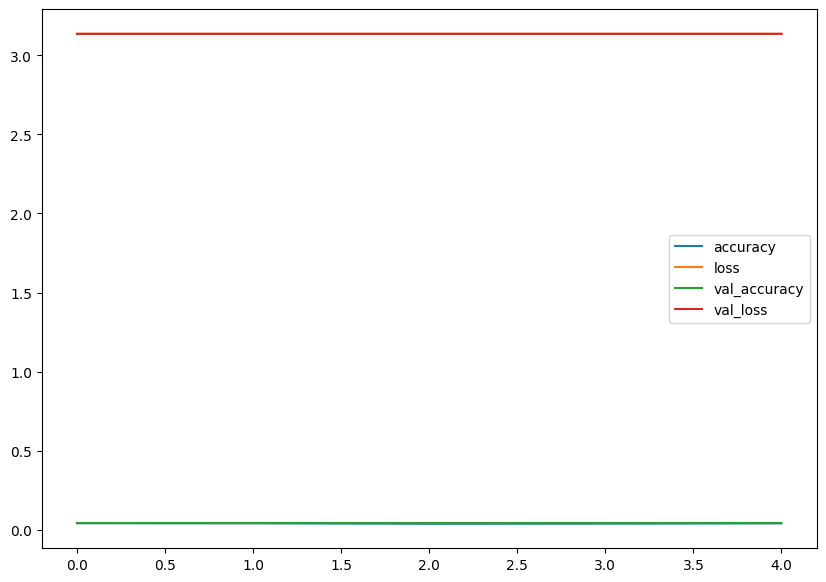

In [37]:
pd.DataFrame(history1_1.history).plot(figsize=(10,7))

In [38]:
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [39]:
model2_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same',input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.DepthwiseConv2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.DepthwiseConv2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(256,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(23,activation='softmax')])
model2_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model2_1.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 55, 55, 64)     │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 55, 55, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 53, 53, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,312,183 (8.82 MB)

 Trainable params: 2,305,655 (8.80 MB)

 Non-trainable params: 6,528 (25.50 KB)

In [40]:
history2_1=model2_1.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 367s 588ms/step - accuracy: 0.0903 - loss: 3.1030 - val_accuracy: 0.1209 - val_loss: 3.0535
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 346s 589ms/step - accuracy: 0.1506 - loss: 2.8434 - val_accuracy: 0.1426 - val_loss: 2.9934
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 352s 599ms/step - accuracy: 0.2052 - loss: 2.6866 - val_accuracy: 0.1852 - val_loss: 2.8947
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 341s 580ms/step - accuracy: 0.2278 - loss: 2.5665 - val_accuracy: 0.2009 - val_loss: 2.9218
Epoch 5/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 335s 572ms/step - accuracy: 0.2658 - loss: 2.4341 - val_accuracy: 0.2583 - val_loss: 2.6771
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 336s 573ms/step - accuracy: 0.3017 - loss: 2.3263 - val_accuracy: 0.1904 - val_loss: 3.1542
Epoch 7/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 328s 558ms/step - accuracy: 0.3296 - loss: 2.1845 - val_accuracy: 0.3161 - val_loss: 2.2758
Epoch 8/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 330s 561ms/step - accuracy: 0.3708 -

<Axes: >

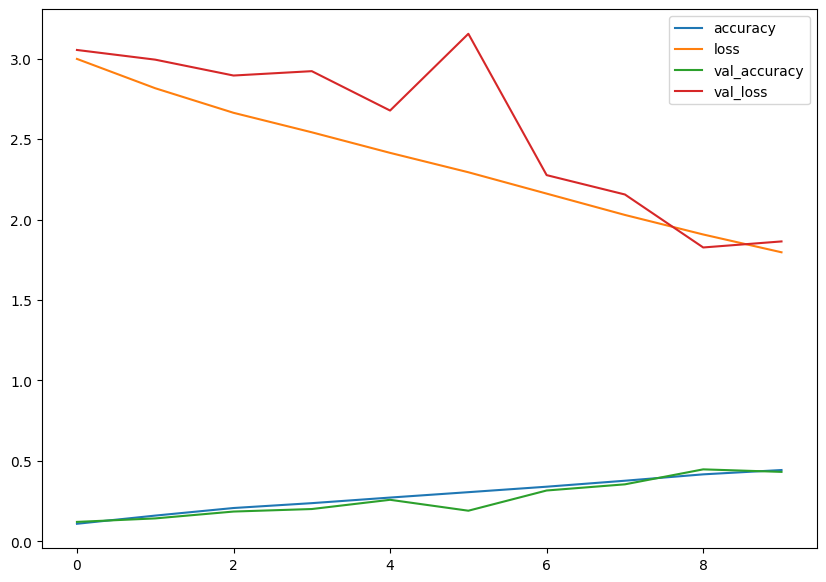

In [41]:
pd.DataFrame(history2_1.history).plot(figsize=(10,7))

In [42]:
model2_2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same',input_shape=(663,540,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.DepthwiseConv2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.DepthwiseConv2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(256,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(512,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(23,activation='softmax')])
model2_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model2_2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 663, 540, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 663, 540, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 663, 540, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 331, 270, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 331, 270, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 331, 270, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 331, 270, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 165, 135, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 165, 135, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 165, 135, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 165, 135, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 164, 134, 64)   │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 164, 134, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 164, 134, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 162, 132, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 162, 132, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 162, 132, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 81, 66, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 79, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 79, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 79, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,675,319 (17.83 MB)

 Trainable params: 4,667,255 (17.80 MB)

 Non-trainable params: 8,064 (31.50 KB)

In [43]:
history2_2=model2_2.fit(train_data_truesize,epochs=5,validation_data=val_data_truesize)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


580/580 ━━━━━━━━━━━━━━━━━━━━ 2002s 3s/step - accuracy: 0.0734 - loss: 3.1376 - val_accuracy: 0.0800 - val_loss: 3.1191
Epoch 2/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 1993s 3s/step - accuracy: 0.1200 - loss: 2.9449 - val_accuracy: 0.1009 - val_loss: 3.7625
Epoch 3/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 2044s 3s/step - accuracy: 0.1442 - loss: 2.8400 - val_accuracy: 0.1274 - val_loss: 3.0078
Epoch 4/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 1904s 3s/step - accuracy: 0.1777 - loss: 2.7387 - val_accuracy: 0.1604 - val_loss: 3.0067
Epoch 5/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 1887s 3s/step - accuracy: 0.2036 - loss: 2.6462 - val_accuracy: 0.1174 - val_loss: 3.6963


<Axes: >

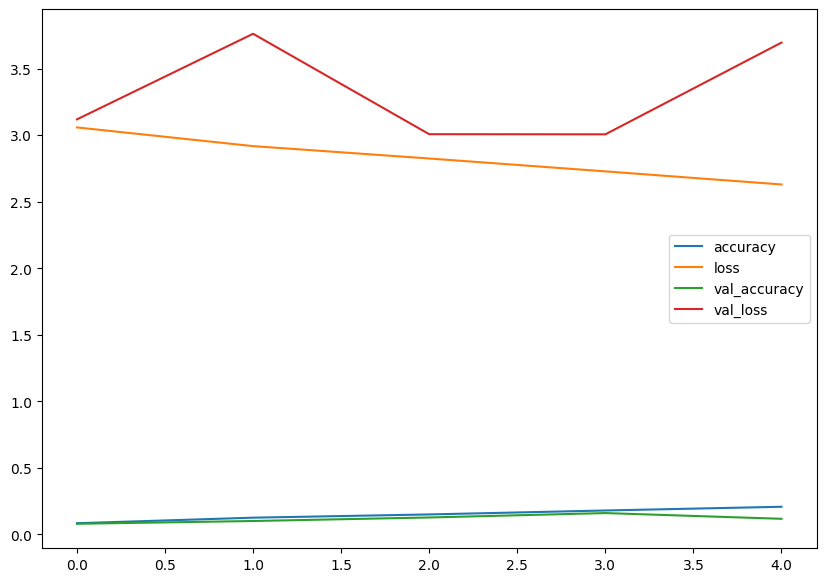

In [44]:
pd.DataFrame(history2_2.history).plot(figsize=(10,7))

In [11]:
model3=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same',input_shape=(224,224,3),kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3),padding='same',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3),padding='same',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.DepthwiseConv2D((2,2), depthwise_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.DepthwiseConv2D((2,2), depthwise_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(256,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    Dense(1024, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(128, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dense(64, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(23,activation='softmax')])
model3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model3.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 55, 55, 64)     │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 55, 55, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 53, 53, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,312,183 (8.82 MB)

 Trainable params: 2,305,655 (8.80 MB)

 Non-trainable params: 6,528 (25.50 KB)

In [12]:
history3=model3.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1726720223.444694     129 service.cc:145] XLA service 0x7d22f0015730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726720223.444757     129 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726720223.444761     129 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/580 ━━━━━━━━━━━━━━━━━━━━ 46s 81ms/step - accuracy: 0.0625 - loss: 28.1966   

I0000 00:00:1726720236.026970     129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


580/580 ━━━━━━━━━━━━━━━━━━━━ 295s 464ms/step - accuracy: 0.0911 - loss: 17.7251 - val_accuracy: 0.0404 - val_loss: 4.5147
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 258s 440ms/step - accuracy: 0.0910 - loss: 4.0212 - val_accuracy: 0.0478 - val_loss: 3.5783
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 257s 438ms/step - accuracy: 0.0825 - loss: 3.4078 - val_accuracy: 0.0439 - val_loss: 3.3227
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 257s 438ms/step - accuracy: 0.0765 - loss: 3.2307 - val_accuracy: 0.0691 - val_loss: 3.2764
Epoch 5/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 260s 442ms/step - accuracy: 0.0592 - loss: 3.3417 - val_accuracy: 0.0435 - val_loss: 3.3488
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 260s 443ms/step - accuracy: 0.0553 - loss: 3.3066 - val_accuracy: 0.0435 - val_loss: 3.3323
Epoch 7/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 256s 436ms/step - accuracy: 0.0519 - loss: 3.2721 - val_accuracy: 0.0496 - val_loss: 3.2470
Epoch 8/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 257s 437ms/step - accuracy: 0.0525 - loss: 3.3

<Axes: >

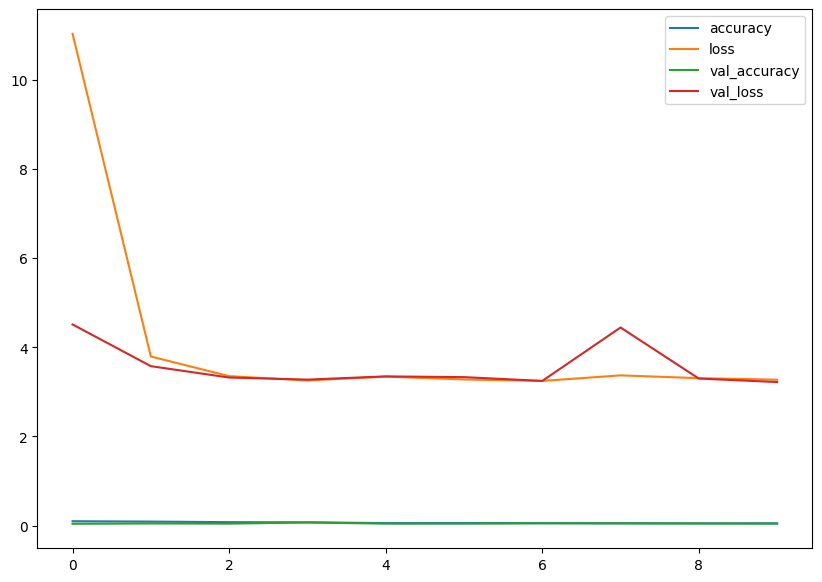

In [13]:
pd.DataFrame(history3.history).plot(figsize=(10,7))

In [14]:
model4=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same',input_shape=(224,224,3),kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3),padding='same',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3),padding='same',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.DepthwiseConv2D((2,2), depthwise_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.DepthwiseConv2D((2,2), depthwise_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(256,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    Dense(1024, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(128, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(64, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(23,activation='softmax')])
model4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model4.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 55, 55, 64)     │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 55, 55, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 53, 53, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,312,183 (8.82 MB)

 Trainable params: 2,305,655 (8.80 MB)

 Non-trainable params: 6,528 (25.50 KB)

In [15]:
history4=model4.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 308s 485ms/step - accuracy: 0.0455 - loss: 20.5694 - val_accuracy: 0.0435 - val_loss: 5.7836
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 274s 467ms/step - accuracy: 0.0481 - loss: 4.9034 - val_accuracy: 0.0478 - val_loss: 3.6329
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 268s 457ms/step - accuracy: 0.0521 - loss: 3.5973 - val_accuracy: 0.0430 - val_loss: 3.4513
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 269s 458ms/step - accuracy: 0.0587 - loss: 3.3695 - val_accuracy: 0.0435 - val_loss: 3.3542
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 266s 454ms/step - accuracy: 0.0545 - loss: 3.4213 - val_accuracy: 0.0422 - val_loss: 9.9279
Epoch 10/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 313s 439ms/step - accuracy: 0.0492 - loss: 3.4681 - val_accuracy: 0.0578 - val_loss: 3.8019


<Axes: >

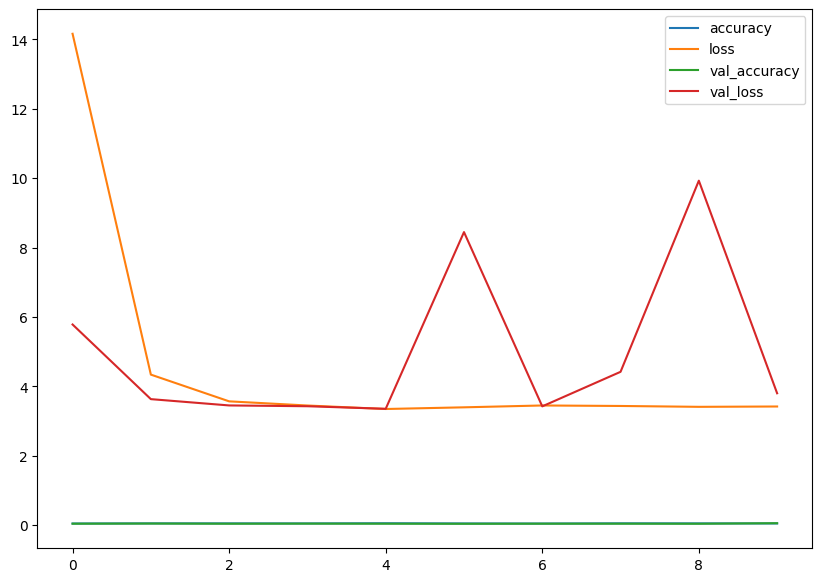

In [16]:
pd.DataFrame(history4.history).plot(figsize=(10,7))

In [ ]:
model5=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same',input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.DepthwiseConv2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.DepthwiseConv2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(256,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3, 3),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(23,activation='softmax')])
model5.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model5.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

In [ ]:
history5=model5.fit(train_data,epochs=10,validation_data=val_data)

In [ ]:
pd.DataFrame(history5.history).plot(figsize=(10,7))

In [ ]:
import tensorflow as tf

vgg16_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(23, activation='softmax')
])

vgg16_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

vgg16_model.summary()


In [ ]:
vgg16_history=vgg16_model.fit(train_data,epochs=10,validation_data=val_data,batch_size=128)